In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("C:/Users/megal/Downloads/", path)

C:\Users\megal\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 48.6k/48.6k [00:00<00:00, 214kB/s]

Extracting files...
C:/Users/megal/Downloads/ C:\Users\megal\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
df = pd.read_csv("C:/Users/megal/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
'''
conclusion ->
All the columns are in the appropriate data types, and there are null values only in the unnamed columns.
'''

''

In [4]:
#The unnamed column contains only null values, so it will be dropped
df = df.drop(columns = ['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#getting the value count
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
#label encoding for target column
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [7]:
#Statistical Analysis
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
'''
In the Diagnosis column,mean is almost similar to median, implying that the data is symmetric.
'''

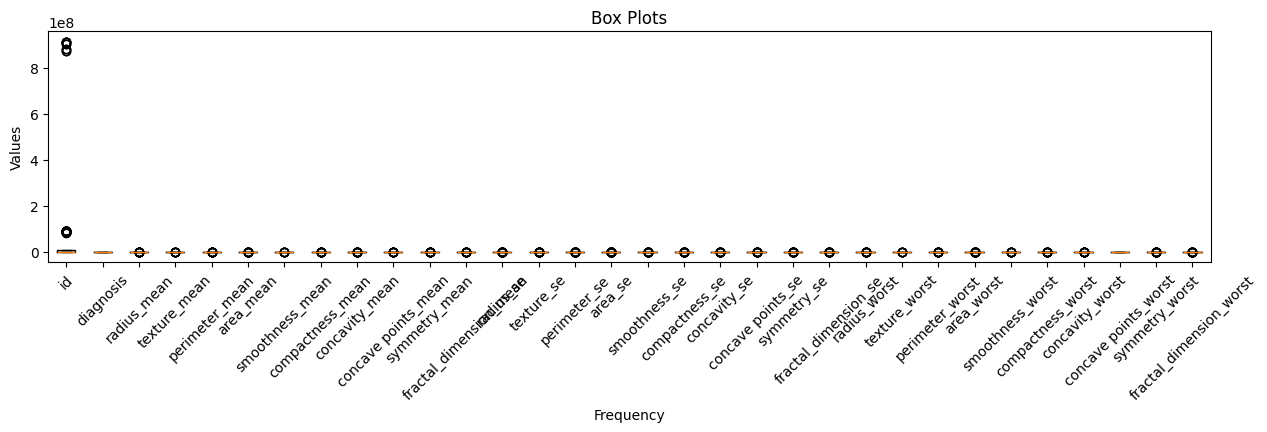

In [8]:
#box plot to see outliers
plt.figure(figsize = (15,3))
plt.boxplot(df.values)
plt.title('Box Plots')
plt.xticks(ticks = range(1,len(df.columns)+1),labels = df.columns,rotation = 45)
plt.xlabel('Frequency')
plt.ylabel('Values')
plt.show()

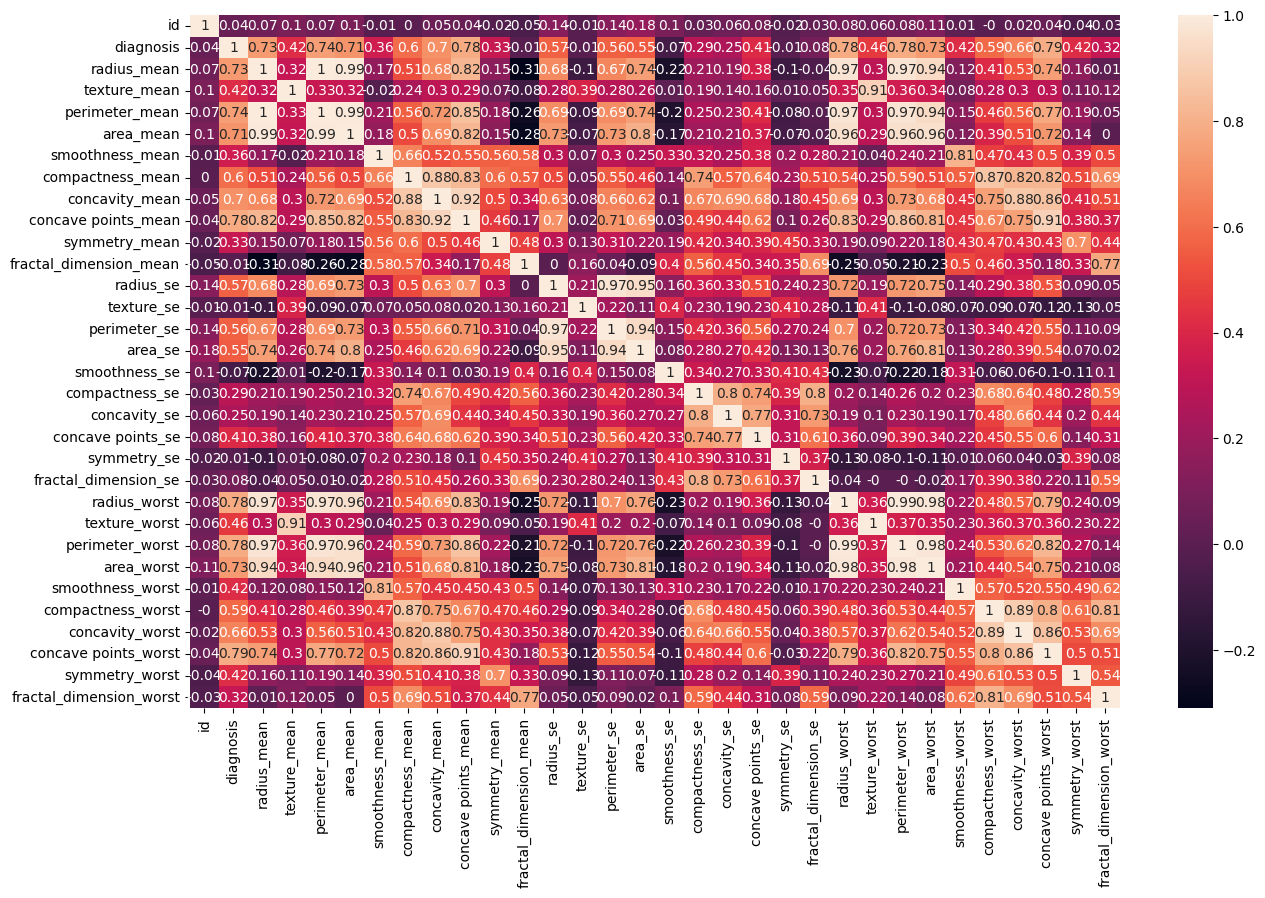

In [9]:
#multicollinearity test (Pearson's and correlation coefficient)
plt.figure(figsize = (15,9))
sns.heatmap(df.corr().round(2),annot = True)
plt.show()

In [ ]:
'''
Conclusion ->
1.concave points_worst,concavity_worst,area_worst,perimeter_worst,radius_worst,concave points_mean,concavity_mean,area_mean,perimeter_mean and radius_mean have a strong positive relationship w.r.t target variable
'''

In [10]:
#seperating input features and target variable
x = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [11]:
#performing train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [12]:
#standardizing featurs
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
#initalizing model
lr = LogisticRegression()

#fitting the model
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#taking prediction probabilites
y_train_prob = lr.predict_proba(x_train)[:,1]
y_prob = lr.predict_proba(x_test)[:, 1]

In [ ]:
# default threshold of 0.5
y_train_pred_default = (y_train_prob >=0.5).astype(int)
y_pred_default = (y_prob >= 0.5).astype(int)

In [18]:
#model evluation on training data 
print('Training Confusio Matric :\n',np.round(metrics.confusion_matrix(y_train_pred_default,y_train),2))
print("Training Precision :",np.round(metrics.precision_score(y_train, y_train_pred_default),2))
print("Training Recall :",np.round(metrics.recall_score(y_train, y_train_pred_default),2))
print("Traning Roc_auc :", np.round(metrics.roc_auc_score(y_train, y_train_pred_default),2))

#model evaluation on testing data
print("\nTesting Confusion Matrix:\n", np.round( metrics.confusion_matrix(y_test, y_pred_default),2))
print("Testing precision :",np.round( metrics.precision_score(y_test, y_pred_default),2))
print("Tesing Recall :",np.round( metrics.recall_score(y_test, y_pred_default),2))
print("Testing Roc_auc :",np.round( metrics.roc_auc_score(y_test, y_pred_default),2))



Training Confusio Matric :
 [[290   3]
 [  1 161]]
Training Precision : 0.99
Training Recall : 0.98
Traning Roc_auc : 0.99

Testing Confusion Matrix:
 [[66  0]
 [ 3 45]]
Testing precision : 1.0
Tesing Recall : 0.94
Testing Roc_auc : 0.97


In [ ]:
'''
The above model is good model,
because in the confusion metrics for training i get -->
true positive = 290 
false negative = 3
false posivtive = 1
true negative = 161

because in the confusion metrics for training i get -->
true positive = 66 
false negative = 0
false posivtive = 3
true negative = 45
the model has high accuracy, precision, recall, and F1 score. 
And the model has good scores in the ROC-AUC curve 

Good Training and Testing roc_acu score
'''

In [29]:
# Explanation of the Sigmoid Function
print("\nThe Sigmoid Function is defined as:")
print("f(x) = 1 / (1 + exp(-x))")
print("It maps any real-valued number into the range (0, 1), making it useful for binary classification.")


The Sigmoid Function is defined as:
f(x) = 1 / (1 + exp(-x))
It maps any real-valued number into the range (0, 1), making it useful for binary classification.
